<a href="https://colab.research.google.com/github/ktgokr/machineLearning/blob/main/height_and_weight%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
#read weight-height dataset
url ="http://raw.githubusercontent.com/solaris33/data-science-for-all/main/lecture_4/weight-height.csv"
weight_height_df = pd.read_csv(url)

In [ ]:
weight_height_df.shape #행렬의 개수 확인

(10000, 3)

In [ ]:
weight_height_df.head() #읽기가 성공하면 확인차 

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [ ]:
#인치 -> cm ib -> kg
weight_height_df["Height"]= weight_height_df["Height"].apply(lambda x: x*2.54)
weight_height_df["Weight"]= weight_height_df["Weight"].apply(lambda x: x*0.4563)

In [ ]:
weight_height_df.head()

,Gender,Height,Weight
0,Male,187.571423,110.376033
1,Male,174.706036,74.062269
2,Male,188.239668,97.073652
3,Male,182.196685,100.405379
4,Male,177.499761,94.157414


In [ ]:
weight_height_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [ ]:
weight_height_df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,168.573602,73.665235
std,9.772721,14.651081
min,137.828359,29.522668
25%,161.304276,61.973777
50%,168.447898,73.561459
75%,175.702625,85.405454
max,200.656806,123.196299


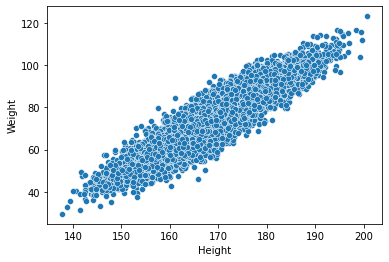

In [ ]:
X = weight_height_df["Height"] #입력데이터
Y = weight_height_df["Weight"] #정답데이터
sns.scatterplot(x= X, y=Y)
plt.show()

In [ ]:
# 80%는 트레이닝 데이터, 20%는 테스트 데이터로 나눕니다.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.2)

In [ ]:
#선형회귀 모델 선언
Ir = LinearRegression()

In [ ]:
#선형회귀 모델 학습
#reshape 부분 유의
Ir.fit(X_train.values.reshape(-1,1), Y_train)

LinearRegression()

In [ ]:
#테스트 데이터에 대한 예측을 수행
Y_pred = Ir.predict(X_test.values.reshape(-1,1))

In [ ]:
Y_test

518      81.529855
3603     70.112874
9505     47.175463
8206     69.959580
9733     70.015395
           ...    
2127     92.103915
3634     81.186800
3757    112.128325
338      85.003211
1131     94.222397
Name: Weight, Length: 2000, dtype: float64

In [ ]:
X_test.shape

(2000,)

In [ ]:
#MSE(Mean Squared Error)를 측정합니다.
MSE = mean_squared_error(Y_test, Y_pred)

#RMSE(Root Mean Squared Error)를 측정합니다.
RMSE = np.sqrt(MSE)

print("MSE: ", MSE)
print("RMSE: ", RMSE)

MSE:  30.762033600397103
RMSE:  5.546353180279552


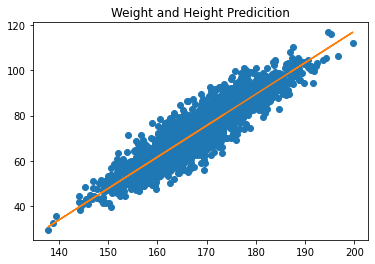

In [ ]:
plt.plot(X_test, Y_test, 'o')
plt.plot(X_test, Ir.predict(X_test.values.reshape(-1,1)))
plt.title('Weight and Height Predicition')
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')